In [14]:
import pandas as pd
import numpy as np

# File path
file_path = '/Users/allig/ads/508/full_satcat.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63073 entries, 0 to 63072
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        63073 non-null  int64  
 1   OBJECT_NAME       63073 non-null  object 
 2   OBJECT_ID         63073 non-null  object 
 3   NORAD_CAT_ID      63073 non-null  int64  
 4   OBJECT_TYPE       63073 non-null  object 
 5   OPS_STATUS_CODE   45825 non-null  object 
 6   OWNER             63073 non-null  object 
 7   LAUNCH_DATE       63073 non-null  object 
 8   LAUNCH_SITE       63073 non-null  object 
 9   DECAY_DATE        32937 non-null  object 
 10  PERIOD            62165 non-null  float64
 11  INCLINATION       62165 non-null  float64
 12  APOGEE            62165 non-null  float64
 13  PERIGEE           62165 non-null  float64
 14  RCS               32931 non-null  float64
 15  DATA_STATUS_CODE  1171 non-null   object 
 16  ORBIT_CENTER      63073 non-null  object

,Unnamed: 0,OBJECT_NAME,OBJECT_ID,NORAD_CAT_ID,OBJECT_TYPE,OPS_STATUS_CODE,OWNER,LAUNCH_DATE,LAUNCH_SITE,DECAY_DATE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE
0,0,SL-1 R/B,1957-001A,1,R/B,D,CIS,1957-10-04,TYMSC,1957-12-01,96.19,65.10,938.0,214.0,20.420,NaN,EA,IMP
1,1,SPUTNIK 1,1957-001B,2,PAY,D,CIS,1957-10-04,TYMSC,1958-01-03,96.10,65.00,1080.0,64.0,NaN,NaN,EA,IMP
2,2,SPUTNIK 2,1957-002A,3,PAY,D,CIS,1957-11-03,TYMSC,1958-04-14,103.74,65.33,1659.0,211.0,0.080,NaN,EA,IMP
3,3,EXPLORER 1,1958-001A,4,PAY,D,US,1958-02-01,AFETR,1970-03-31,88.48,33.15,215.0,183.0,NaN,NaN,EA,IMP
4,4,VANGUARD 1,1958-002B,5,PAY,NaN,US,1958-03-17,AFETR,NaN,132.61,34.25,3822.0,650.0,0.122,NaN,EA,ORB


In [15]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Summary statistics for numerical columns
print("\nSummary Statistics:\n", df.describe())


Missing Values:
 Unnamed: 0              0
OBJECT_NAME             0
OBJECT_ID               0
NORAD_CAT_ID            0
OBJECT_TYPE             0
OPS_STATUS_CODE     17248
OWNER                   0
LAUNCH_DATE             0
LAUNCH_SITE             0
DECAY_DATE          30136
PERIOD                908
INCLINATION           908
APOGEE                908
PERIGEE               908
RCS                 30142
DATA_STATUS_CODE    61902
ORBIT_CENTER            0
ORBIT_TYPE              0
dtype: int64

Summary Statistics:
          Unnamed: 0  NORAD_CAT_ID        PERIOD   INCLINATION         APOGEE  \
count  63073.000000   63073.00000  62165.000000  62165.000000   62165.000000   
mean   31536.000000   31545.88499    179.444980     69.073459    3604.447519   
std    18207.751101   18220.55300    693.984559     25.092792   14008.818079   
min        0.000000       1.00000      0.000000      0.000000       0.000000   
25%    15768.000000   15769.00000     89.280000     53.030000     268.000000   


In [16]:
# Check unique values per column
unique_counts = df.nunique().sort_values()
print("Unique Values per Column:\n", unique_counts)

# Count categorical values
categorical_columns = df.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))


Unique Values per Column:
 DATA_STATUS_CODE        3
ORBIT_TYPE              4
OBJECT_TYPE             4
OPS_STATUS_CODE         7
ORBIT_CENTER           18
LAUNCH_SITE            36
OWNER                 125
PERIGEE              3719
LAUNCH_DATE          5644
APOGEE               6658
INCLINATION          6800
PERIOD               8261
RCS                 10800
DECAY_DATE          14562
OBJECT_NAME         22276
OBJECT_ID           63073
NORAD_CAT_ID        63073
Unnamed: 0          63073
dtype: int64

Column: OBJECT_NAME
OBJECT_NAME
FENGYUN 1C DEB        3531
DELTA 1 DEB           1833
COSMOS 1408 DEB       1806
COSMOS 2251 DEB       1714
CZ-6A DEB             1460
SL-4 R/B              1193
PEGASUS DEB            767
THORAD AGENA D DEB     700
SL-12 DEB              685
IRIDIUM 33 DEB         656
Name: count, dtype: int64

Column: OBJECT_ID
OBJECT_ID
1957-001A     1
2017-008CW    1
2017-008CY    1
2017-008CZ    1
2017-008DA    1
2017-008DB    1
2017-008DC    1
2017-008DD    1
2017-0

In [17]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("Updated Column Names:\n", df.columns)


Updated Column Names:
 Index(['unnamed:_0', 'object_name', 'object_id', 'norad_cat_id', 'object_type',
       'ops_status_code', 'owner', 'launch_date', 'launch_site', 'decay_date',
       'period', 'inclination', 'apogee', 'perigee', 'rcs', 'data_status_code',
       'orbit_center', 'orbit_type'],
      dtype='object')


In [18]:
# Drop columns where more than 50% of values are missing
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Fill missing values
for col in df.columns:
    if df[col].dtype == "object":  # Categorical columns
        df[col] = df[col].fillna("Unknown")
    else:  # Numeric columns
        df[col] = df[col].fillna(df[col].median())

# Verify missing values
print("Remaining Missing Values:\n", df.isnull().sum())


Remaining Missing Values:
 unnamed:_0         0
object_name        0
object_id          0
norad_cat_id       0
object_type        0
ops_status_code    0
owner              0
launch_date        0
launch_site        0
decay_date         0
period             0
inclination        0
apogee             0
perigee            0
rcs                0
orbit_center       0
orbit_type         0
dtype: int64


In [19]:
# Convert date columns 
date_columns = ["launch_date"]  
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# Convert categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col] = df[col].astype("category")

# Check data types after conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63073 entries, 0 to 63072
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   unnamed:_0       63073 non-null  int64         
 1   object_name      63073 non-null  category      
 2   object_id        63073 non-null  category      
 3   norad_cat_id     63073 non-null  int64         
 4   object_type      63073 non-null  category      
 5   ops_status_code  63073 non-null  category      
 6   owner            63073 non-null  category      
 7   launch_date      63073 non-null  datetime64[ns]
 8   launch_site      63073 non-null  category      
 9   decay_date       63073 non-null  category      
 10  period           63073 non-null  float64       
 11  inclination      63073 non-null  float64       
 12  apogee           63073 non-null  float64       
 13  perigee          63073 non-null  float64       
 14  rcs              63073 non-null  float

In [20]:
# Remove duplicate rows
df = df.drop_duplicates()

print(f"Dataset now has {df.shape[0]} rows and {df.shape[1]} columns after removing duplicates.")


Dataset now has 63073 rows and 17 columns after removing duplicates.


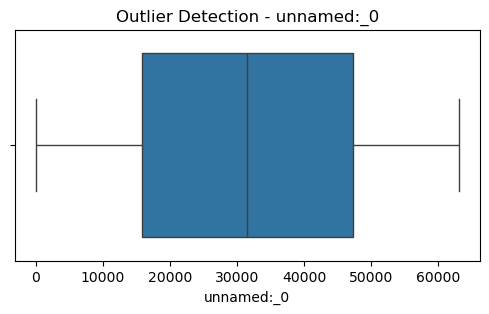

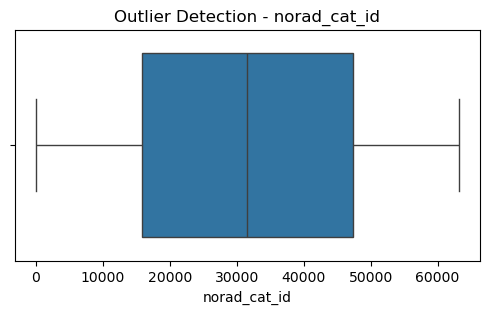

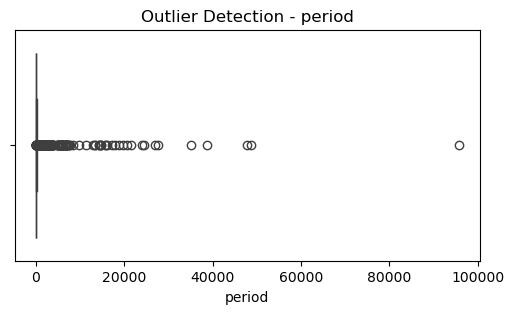

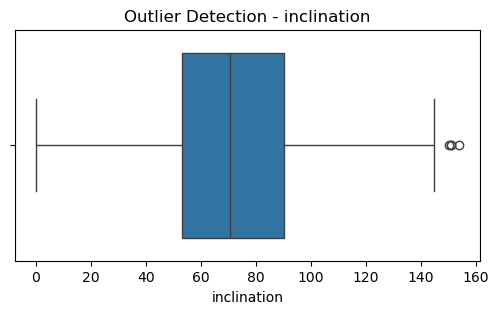

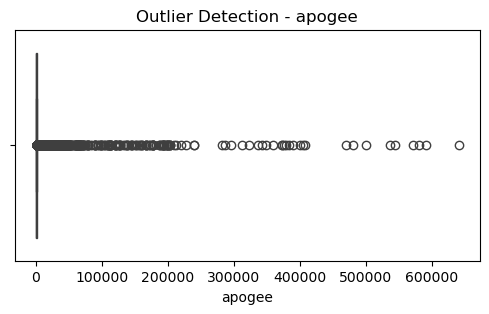

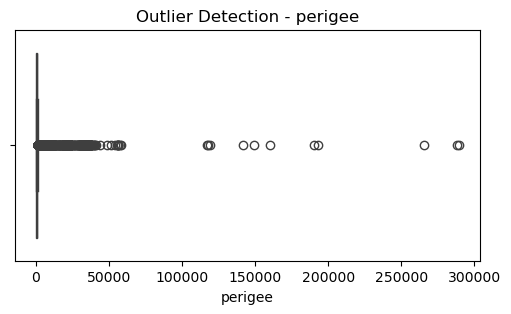

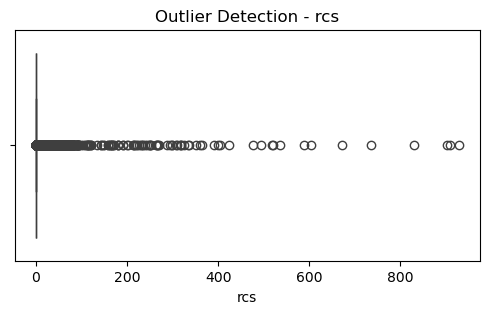

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify outliers using box plots
numerical_cols = df.select_dtypes(include=["number"]).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection - {col}")
    plt.show()


In [22]:
# Remove outliers beyond 3 standard deviations
for col in numerical_cols:
    df = df[(np.abs(df[col] - df[col].mean()) <= (3 * df[col].std()))]

print("Outliers removed.")


Outliers removed.


In [23]:
# Save cleaned dataset
cleaned_file_path = '/Users/allig/ads/508/full_satcat_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")


Cleaned dataset saved at: /Users/allig/ads/508/full_satcat_cleaned.csv
